In [1]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from hdf5storage import loadmat,savemat

In [16]:
outdict=loadmat ('./stroke_coh.mat')
WMSC_mat=outdict['WMSC_mat']
stroke_coh=outdict['stroke_coh']
WMSC_mat_binary=outdict['WMSC_mat_binary']
stroke_coh_binary=outdict['stroke_coh_binary']

WCA_WMSC Method (over time)

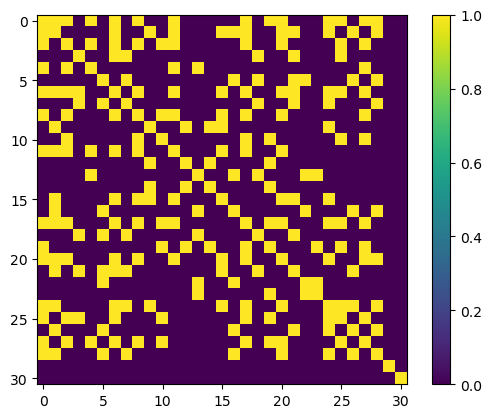

In [17]:
plt.imshow(WMSC_mat_binary[9,:,:])
plt.colorbar()

In [19]:
# compute network properties of degree centrality
dg_WMSC=np.zeros((10,31))
for tp in range(10):
    mat=np.copy(WMSC_mat_binary[tp,:,:])
    mat[range(mat.shape[0]),range(mat.shape[0])]=0 # reomve the self-connection in the diagonal
    G= nx.from_numpy_array(mat)
    dg_ctr=nx.degree_centrality(G)
    for ch in range(31):
        dg_WMSC[tp,ch] =dg_ctr[ch]


Text(0.5, 1.0, 'degree centrality of 32 channel network based on WMSC')

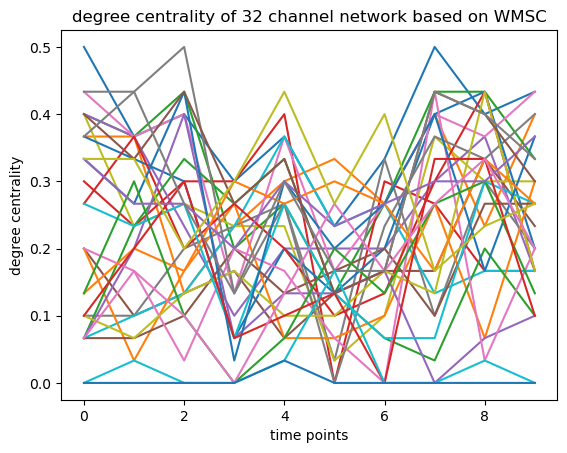

In [24]:
plt.plot(np.arange(10),dg_WMSC)
plt.xlabel('time points')
plt.ylabel('degree centrality')
plt.title('degree centrality of 32 channel network based on WMSC')

HNL Method

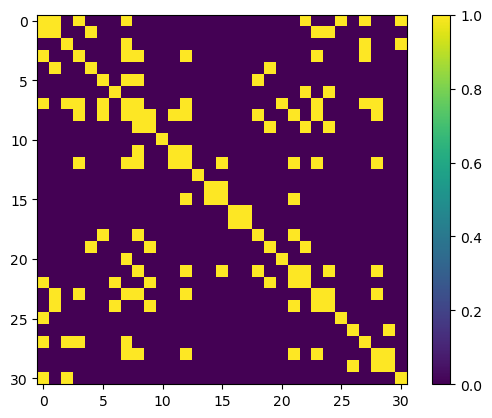

In [20]:
plt.imshow(stroke_coh_binary)
plt.colorbar()

In [21]:
# compute network properties of degree centrality
dg_HNL=np.zeros((1,31))
mat=np.copy(stroke_coh_binary)
mat[range(mat.shape[0]),range(mat.shape[0])]=0 # reomve the self-connection in the diagonal
G= nx.from_numpy_array(mat)
dg_ctr=nx.degree_centrality(G)
for ch in range(31):
    dg_HNL[0,ch] =dg_ctr[ch]

Text(0.5, 1.0, 'degree centrality of 32 channel network based on ordinary coherence')

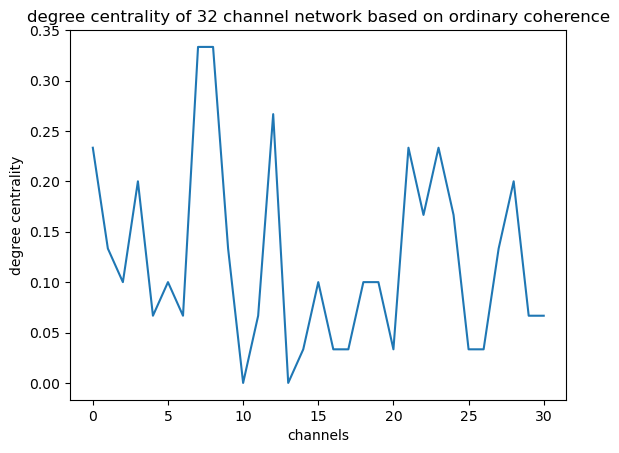

In [30]:
plt.plot(np.arange(31),dg_HNL[0])
plt.xlabel('channels')
plt.ylabel('degree centrality')
plt.title('degree centrality of 32 channel network based on ordinary coherence')

In [22]:
outdict=dict()
outdict['dg_WMSC']=dg_WMSC
outdict['dg_HNL']=dg_HNL
savemat('degree',outdict)